In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("results.csv")
df.head()

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.047650,0.013545,0.005137,0.79995,0.32904,0.40549,0.15991,0.054145,0.007522,0.004189,0.067516,0.000328,0.000328
1,1,0.047791,0.013802,0.005524,0.48159,0.49346,0.49585,0.19593,0.049829,0.005994,0.002840,0.034516,0.000661,0.000661
2,2,0.048667,0.013883,0.005165,0.57634,0.43456,0.46270,0.16228,0.051603,0.006560,0.001830,0.001515,0.000995,0.000995
3,3,0.049697,0.014838,0.006138,0.44342,0.52322,0.44175,0.16103,0.051999,0.005975,0.002455,0.000999,0.000999,0.000999
4,4,0.049495,0.014022,0.005942,0.40808,0.58369,0.51348,0.19628,0.049859,0.005631,0.003452,0.000999,0.000999,0.000999


In [4]:
df.tail()

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
195,195,0.039100,0.011597,0.002014,0.74714,0.74196,0.72378,0.35242,0.043598,0.004849,0.000769,0.000012,0.000012,0.000012
196,196,0.038947,0.011681,0.002100,0.73109,0.74409,0.72259,0.35353,0.043562,0.004861,0.000765,0.000012,0.000012,0.000012
197,197,0.039367,0.011426,0.002487,0.73056,0.74457,0.72256,0.35221,0.043668,0.004877,0.000768,0.000011,0.000011,0.000011
198,198,0.039264,0.011585,0.002220,0.73470,0.74963,0.71870,0.35062,0.043640,0.004875,0.000758,0.000011,0.000011,0.000011
199,199,0.039626,0.011877,0.002123,0.73370,0.74551,0.71586,0.34973,0.043644,0.004866,0.000770,0.000010,0.000010,0.000010


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")

def plot_csv_metrics(file_path, save_plots=False):
    try:
        df = pd.read_csv(file_path)
    except pd.errors.ParserError:
        df = pd.read_csv(file_path, delimiter="\t")

    df.columns = df.columns.str.strip()

    if "epoch" not in df.columns:
        print("Error: 'epoch' column not found! Check your CSV file.")
        print("Available columns:", df.columns)
        return

    metric_names = [
        "train/box_loss", "val/box_loss", "train/cls_loss", "val/cls_loss",
        "metrics/precision", "metrics/recall", "metrics/mAP_0.5", "metrics/mAP_0.5:0.95"
    ]

    color_palette = sns.color_palette("husl", len(metric_names))

    def plot_metric(metric_column, color):
        """ Plots a single metric with a specific color. """
        if metric_column not in df.columns:
            print(f"Warning: Column '{metric_column}' not found in dataset!")
            return

        plt.figure(figsize=(5, 4))
        plt.plot(df["epoch"], df[metric_column], label=metric_column, linewidth=1.5, color=color)

        plt.xlabel("Epochs")
        plt.ylabel(metric_column)
        plt.title(f"{metric_column} Over Epochs")
        plt.legend()
        plt.grid(True)

        if save_plots:
            filename = f"{metric_column.replace('/', '_')}.png"
            plt.savefig(filename, dpi=300)

        plt.show()

    for i, metric in enumerate(metric_names):
        plot_metric(metric, color_palette[i % len(color_palette)])

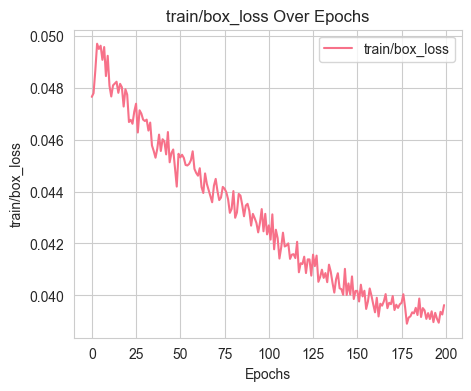

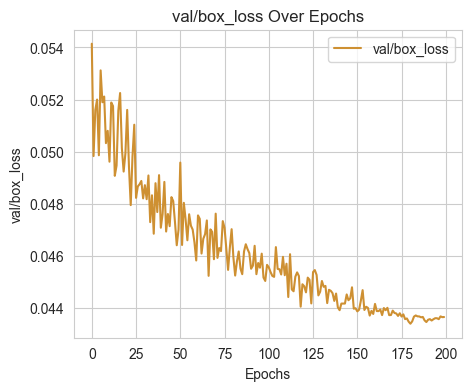

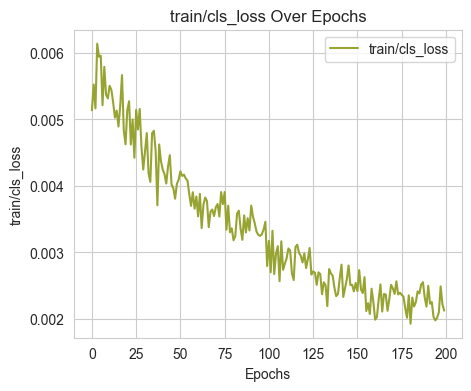

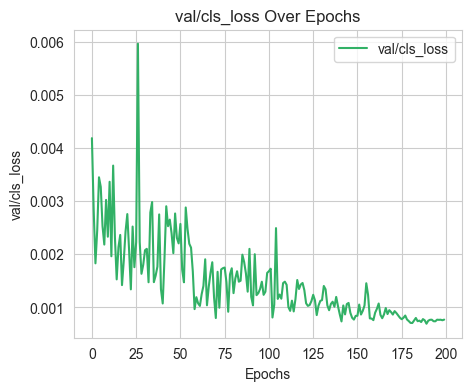

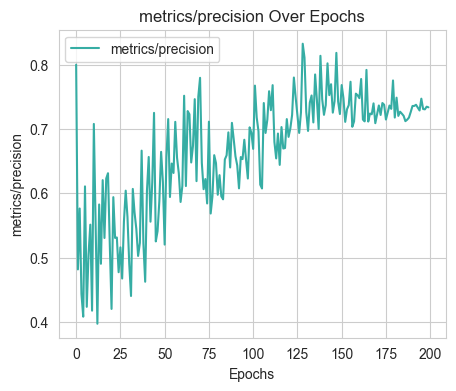

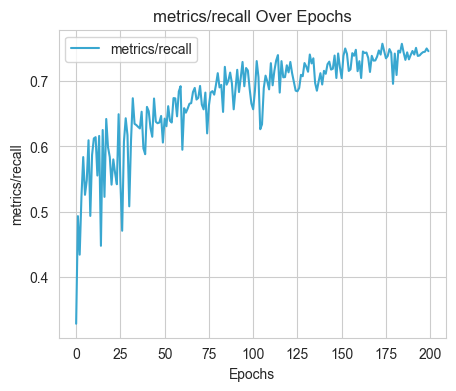

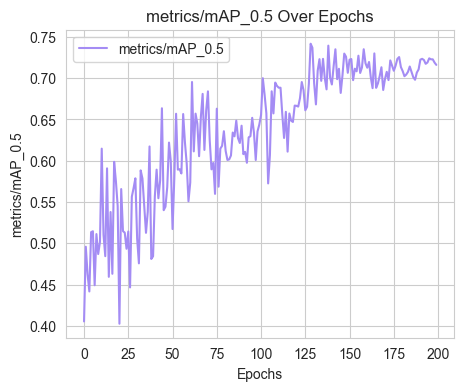

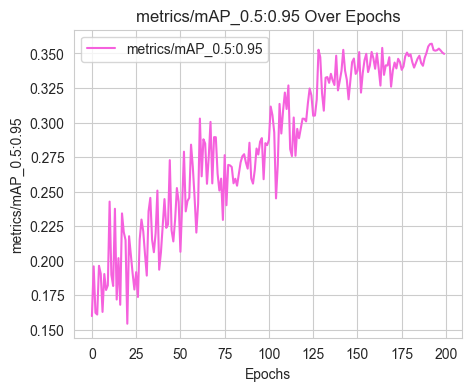

In [31]:
plot_csv_metrics("results.csv")

In [ ]:
!python val.py --img 640 --batch 16 --data data.yaml --weights runs/train/yolo_s/weights/best.pt --name yolo_s_end